In [80]:
import json

def extract_clip_scores(json_file_path):
    # Read the JSON data from the file
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    
    result = {}
    
    # Enumerate through prompts to get indices starting from 0
    for idx, (prompt, prompt_data) in enumerate(data.items()):
        # Get the indices from 1 to 5 (or however many are in the data)
        indices = sorted([int(idx) for idx in prompt_data.keys()])
        
        # Extract clip scores in order
        clip_scores = [float(prompt_data[str(idx)]["clip_score"]) for idx in indices]
        
        # Use the prompt index as the key (starting from 0)
        result[idx] = clip_scores
    
    return result

# Example usage
file_path = "output/sd-v1.5/gemini/overall_score/20250418_015550/all_nfe_data.json"
# file_path = "output/sd-v1.5/gemini/overall_score/20250512_153437/all_nfe_data.json"
# file_path = "output/sd-v1.5/gemini/overall_score/20250513_152113/all_nfe_data.json"

result = extract_clip_scores(file_path)
print(result)

{0: [0.755615234375, 0.7025146484375, 0.7232666015625, 0.7379150390625, 0.7232666015625], 1: [0.701904296875, 0.6903076171875, 0.7232666015625, 0.73486328125, 0.701904296875], 2: [0.7769775390625, 0.52642822265625, 0.7794189453125, 0.7794189453125, 0.7794189453125], 3: [0.738525390625, 0.7012939453125, 0.7012939453125, 0.7012939453125, 0.7012939453125], 4: [0.8551025390625, 0.8062744140625, 0.787353515625, 0.8660888671875, 0.8526611328125], 5: [0.9051513671875, 0.9405517578125, 0.8935546875, 0.79833984375, 0.79833984375], 6: [0.7183837890625, 0.50262451171875, 0.7379150390625, 0.753173828125, 0.7183837890625], 7: [0.7989501953125, 0.52459716796875, 0.765380859375, 0.7989501953125, 0.7989501953125], 8: [0.7269287109375, 0.8062744140625, 0.8062744140625, 0.7269287109375, 0.8062744140625], 9: [0.7879638671875, 0.8038330078125, 0.718994140625, 0.7452392578125, 0.7452392578125], 10: [0.8123779296875, 0.8123779296875, 0.810546875, 0.8477783203125, 0.8837890625], 11: [0.8050537109375, 0.80505

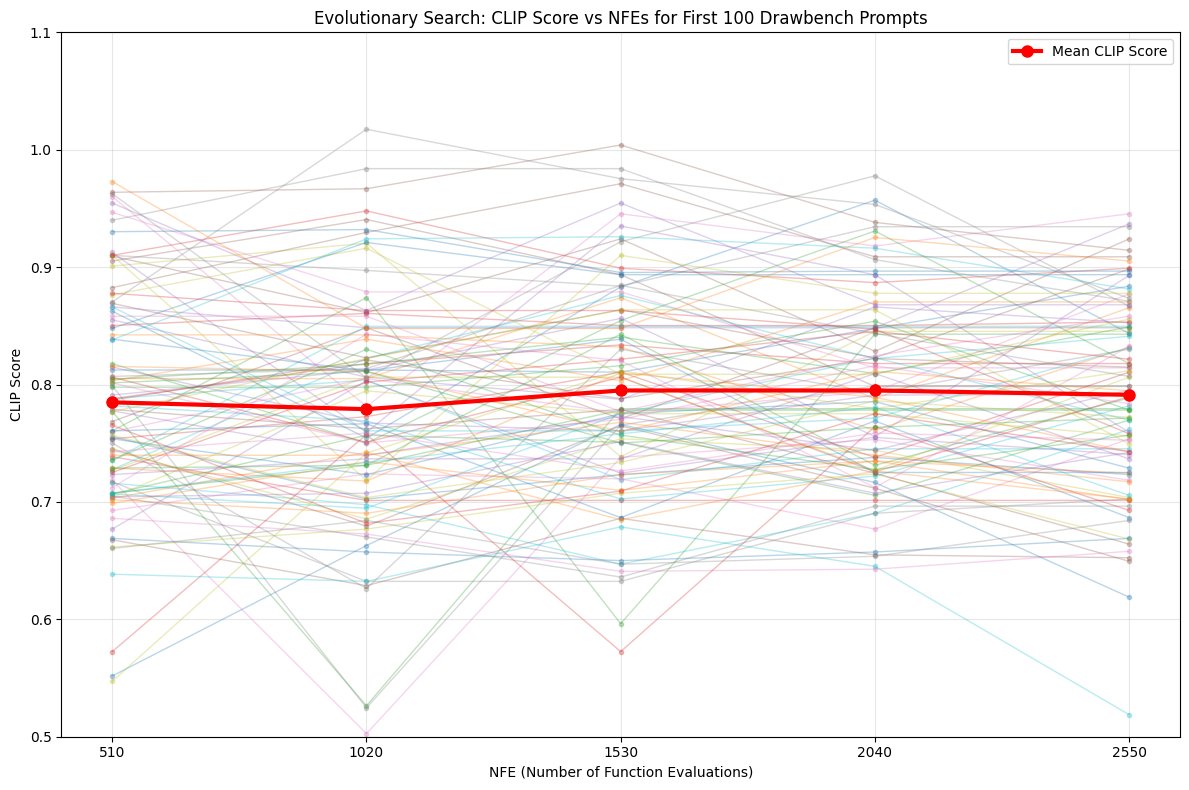

NFE values: [510, 1020, 1530, 2040, 2550]
Means by NFE: [np.float64(0.7848114013671875), np.float64(0.7790130615234375), np.float64(0.79493408203125), np.float64(0.794921875), np.float64(0.79124755859375)]
Standard deviations by NFE: [np.float64(0.09063826594392418), np.float64(0.09544250516774445), np.float64(0.08884048815390662), np.float64(0.07700019790884073), np.float64(0.08043385925145403)]


In [81]:
import json
import numpy as np
import matplotlib.pyplot as plt

def plot_clip_scores(json_file_path):
    # Read the JSON data from the file
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    
    # For storing all clip scores by NFE position
    all_scores_by_nfe = {}
    nfe_values = []
    
    # Process only the first 100 prompts
    prompt_count = 0
    prompts = []
    
    # First pass to collect all NFE values
    for prompt, prompt_data in data.items():
        if prompt_count >= 100:
            break
            
        prompts.append(prompt)
        
        for index, values in prompt_data.items():
            # Get NFE value
            nfe = int(values["NFE"])
            
            # Store NFE value if we haven't seen it before
            if nfe not in nfe_values:
                nfe_values.append(nfe)
        
        prompt_count += 1
    
    # Sort NFE values
    nfe_values.sort()
    
    # Create a figure for individual prompt lines
    plt.figure(figsize=(12, 8))
    
    # Plot each prompt as a separate line
    for prompt in prompts:
        prompt_data = data[prompt]
        x_values = []
        y_values = []
        
        for index, values in prompt_data.items():
            nfe = int(values["NFE"])
            clip_score = float(values["clip_score"])
            
            x_values.append(nfe)
            y_values.append(clip_score)
            
        # Sort by NFE to ensure correct line plotting
        sorted_pairs = sorted(zip(x_values, y_values))
        x_values = [x for x, y in sorted_pairs]
        y_values = [y for x, y in sorted_pairs]
        
        # Plot this prompt's line with low alpha for visibility
        plt.plot(x_values, y_values, 'o-', alpha=0.3, linewidth=1, markersize=3)
    
    # Calculate means for each NFE value for an average line
    means_by_nfe = {}
    for prompt in prompts:
        prompt_data = data[prompt]
        for index, values in prompt_data.items():
            nfe = int(values["NFE"])
            clip_score = float(values["clip_score"])
            
            if nfe not in means_by_nfe:
                means_by_nfe[nfe] = []
            
            means_by_nfe[nfe].append(clip_score)
    
    # Calculate the mean for each NFE
    mean_x = []
    mean_y = []
    for nfe in nfe_values:
        if nfe in means_by_nfe:
            mean_x.append(nfe)
            mean_y.append(np.mean(means_by_nfe[nfe]))
    
    # Plot the mean line with higher emphasis
    plt.plot(mean_x, mean_y, 'o-', color='red', linewidth=3, markersize=8, label='Mean CLIP Score')
    
    plt.xlabel('NFE (Number of Function Evaluations)')
    plt.ylabel('CLIP Score')
    plt.ylim(0.5, 1.1)
    plt.title('Evolutionary Search: CLIP Score vs NFEs for First 100 Drawbench Prompts')
    plt.grid(True, alpha=0.3)
    plt.xticks(nfe_values)  # Force x-axis to show only our actual NFE values
    plt.legend()
    plt.tight_layout()
    
    # Save the figure
    plt.savefig('clip_scores_all_prompts_plot.png', dpi=300)
    
    # Display the plot
    plt.show()
    
    # Calculate means and standard deviations for each NFE value (for return values)
    means = [np.mean(means_by_nfe[nfe]) for nfe in nfe_values]
    stds = [np.std(means_by_nfe[nfe]) for nfe in nfe_values]
    
    return means, stds, nfe_values

# Example usage
means, stds, nfe_values = plot_clip_scores(file_path)
print("NFE values:", nfe_values)
print("Means by NFE:", means)
print("Standard deviations by NFE:", stds)

Error reading output/sd-v1.5/gemini/overall_score/20250418_015550/config.json: 'NoneType' object has no attribute 'strip'
Plot saved as score_vs_search_round.png

Statistics:
NFE 510: Mean = 7.9214, Std = 0.9715, Count = 112
NFE 1020: Mean = 8.2550, Std = 0.8958, Count = 111
NFE 1530: Mean = 8.3342, Std = 0.8383, Count = 111
NFE 2040: Mean = 8.4378, Std = 0.7206, Count = 111
NFE 2550: Mean = 8.5207, Std = 0.7165, Count = 111

Summary:
NFE values: [510, 1020, 1530, 2040, 2550]
Mean scores by NFE: ['7.9214', '8.2550', '8.3342', '8.4378', '8.5207']
Standard deviations by NFE: ['0.9715', '0.8958', '0.8383', '0.7206', '0.7165']


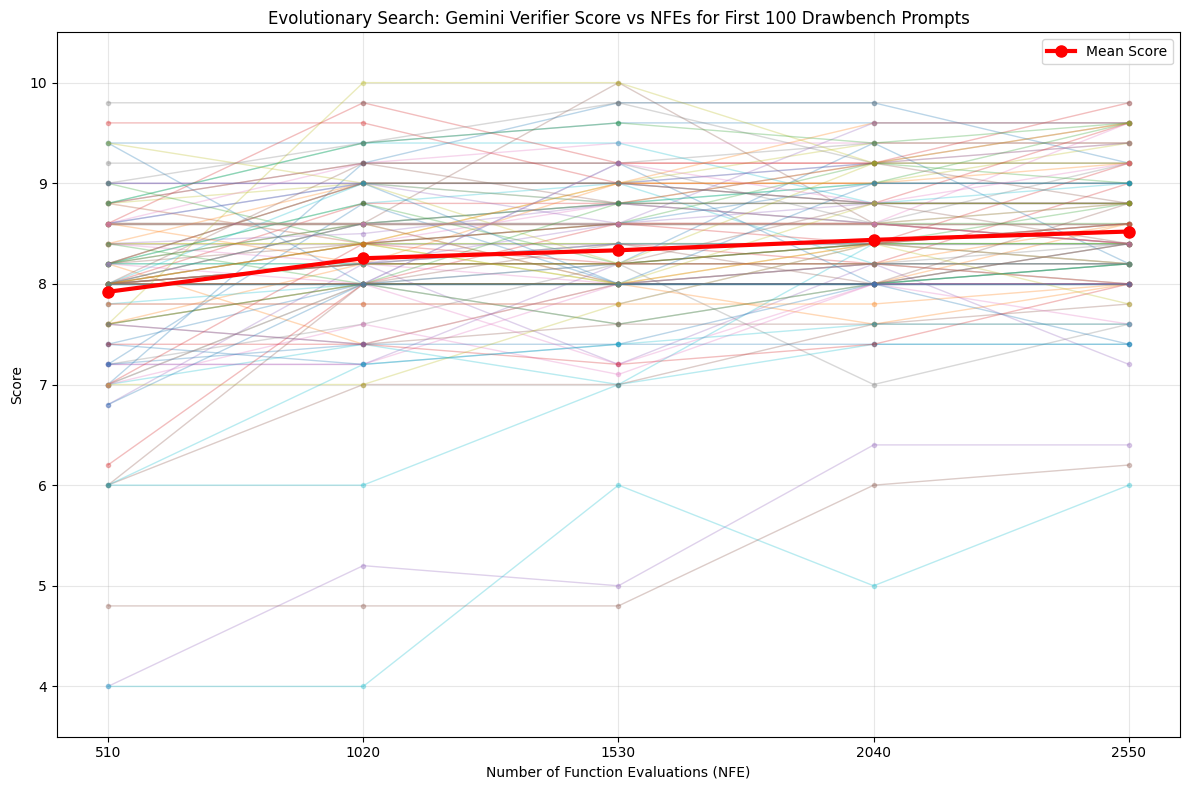

In [74]:
import os
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
import re
from pathlib import Path

def extract_info_from_filename(filename):
    """Extract prompt and search round from filename"""
    # Extract prompt using regex
    prompt_match = re.search(r'prompt@([^_]+(?:_[^_]+)*)__hash', filename)
    prompt = prompt_match.group(1) if prompt_match else "unknown"
    
    # Extract search round using regex
    round_match = re.search(r'_i@(\d+)_', filename)
    search_round = int(round_match.group(1)) if round_match else 0
    
    return prompt, search_round

def read_json_data(filepath):
    """Read JSON file and extract data"""
    try:
        with open(filepath, 'r') as file:
            data = json.load(file)
        
        # Try to get data from JSON content first
        prompt = data.get('prompt', '').strip('.')  # Remove trailing period if present
        search_round = data.get('search_round', 0)
        score = data.get('best_score', {}).get('score', 0)
        
        # If search_round is missing or 0, try to get it from the filename
        if search_round == 0:
            _, round_from_filename = extract_info_from_filename(os.path.basename(filepath))
            search_round = round_from_filename
        
        return prompt, search_round, score
    except Exception as e:
        print(f"Error reading {filepath}: {e}")
        return None, None, None

def plot_scores(json_dir):
    """Plot scores by search round"""
    # Get all JSON files in the directory
    json_files = glob.glob(os.path.join(json_dir, '*.json'))
    
    if not json_files:
        print(f"No JSON files found in {json_dir}")
        return None, None, None
    
    # Dictionary to store scores by prompt and search round
    scores_by_prompt = {}
    
    # Process each file
    for file_path in json_files:
        prompt, search_round, score = read_json_data(file_path)
        
        # Skip invalid data
        if prompt is None or search_round is None or score is None:
            continue
        
        # Store the score
        if prompt not in scores_by_prompt:
            scores_by_prompt[prompt] = {}
        
        scores_by_prompt[prompt][search_round] = score
    
    # Create a figure for the plot
    plt.figure(figsize=(12, 8))
    
    # Search rounds (x-axis values) - NFEs
    search_rounds = list(range(1, 6))  # 1 to 5
    nfe_values = [510 * x for x in range(1, 6)]  # [510, 1020, 1530, 2040, 2550]
    # nfe_values = [102, 306, 714, 1530, 3162]
    
    # For calculating average scores
    all_scores_by_round = {round_num: [] for round_num in search_rounds}
    
    # Plot individual prompt trajectories
    for prompt, rounds_data in scores_by_prompt.items():
        x_values = []
        y_values = []
        
        for i, round_num in enumerate(search_rounds):
            if round_num in rounds_data:
                x_values.append(nfe_values[i])  # Use NFE values for x-axis
                y_values.append(rounds_data[round_num])
                all_scores_by_round[round_num].append(rounds_data[round_num])
        
        # Plot this prompt's trajectory with low alpha
        if len(x_values) > 1:  # Only plot if we have at least 2 points
            plt.plot(x_values, y_values, 'o-', alpha=0.3, linewidth=1, markersize=3)
    
    # Calculate and plot the average line
    mean_x = []
    mean_y = []
    std_y = []
    
    for i, round_num in enumerate(search_rounds):
        if all_scores_by_round[round_num]:  # If we have scores for this round
            mean_x.append(nfe_values[i])  # Use NFE values for x-axis
            mean_y.append(np.mean(all_scores_by_round[round_num]))
            std_y.append(np.std(all_scores_by_round[round_num]))
    
    # Plot the mean line with higher emphasis
    plt.plot(mean_x, mean_y, 'o-', color='red', linewidth=3, markersize=8, label='Mean Score')
    
    # Add labels and title
    plt.xlabel('Number of Function Evaluations (NFE)')
    plt.ylabel('Score')
    plt.title('Evolutionary Search: Gemini Verifier Score vs NFEs for First 100 Drawbench Prompts')
    plt.grid(True, alpha=0.3)
    plt.xticks(nfe_values)  # Use NFE values for x-axis ticks
    plt.ylim(3.5, 10.5)  # Set y-axis limits from 0 to 10
    plt.legend()
    plt.tight_layout()
    
    # Save the figure
    output_file = 'score_vs_search_round.png'
    plt.savefig(output_file, dpi=300)
    print(f"Plot saved as {output_file}")
    
    # Show statistics
    print("\nStatistics:")
    for i, nfe in enumerate(mean_x):
        round_num = search_rounds[i]
        print(f"NFE {nfe}: Mean = {mean_y[i]:.4f}, Std = {std_y[i]:.4f}, Count = {len(all_scores_by_round[round_num])}")
    
    return mean_y, std_y, nfe_values

def main():
    """Main function"""

    path = "output/sd-v1.5/gemini/overall_score/20250418_015550/"
    # path = "output/sd-v1.5/gemini/overall_score/20250512_153437/"
    # path = "output/sd-v1.5/gemini/overall_score/20250513_152113/"


    means, stds, nfe_values = plot_scores(path)
    
    if means:
        print("\nSummary:")
        print("NFE values:", nfe_values)
        print("Mean scores by NFE:", [f"{m:.4f}" for m in means])
        print("Standard deviations by NFE:", [f"{s:.4f}" for s in stds])

if __name__ == "__main__":
    main()

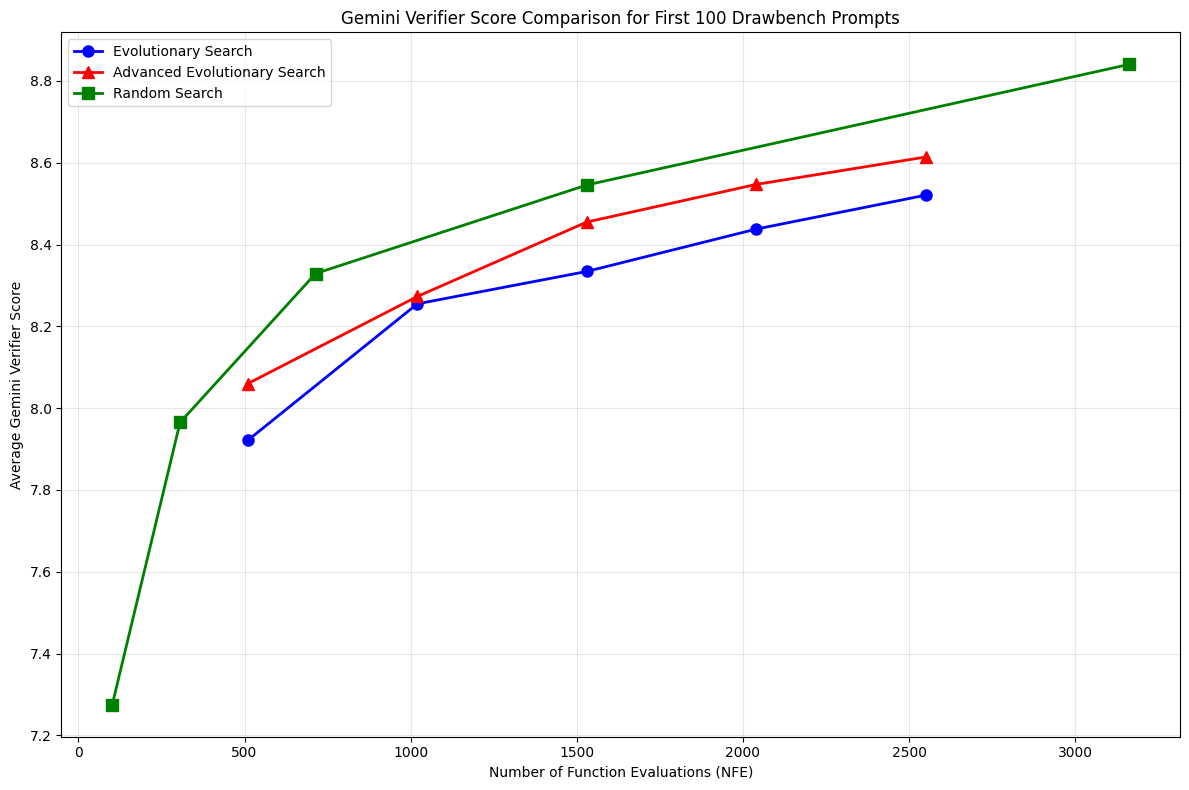

In [75]:
evo_x = [510 * x for x in range(1, 6)]
evo_y = [7.9214, 8.2550, 8.3342, 8.4378, 8.5207]

adv_evo_x = [510 * x for x in range(1, 6)]
adv_evo_y = [8.0600, 8.2730, 8.4550, 8.5470, 8.6140]

random_x = [102, 306, 714, 1530, 3162]
random_y = [7.2750, 7.9650, 8.3291, 8.5456, 8.8405]

# Create a new figure
plt.figure(figsize=(12, 8))

# Plot all three lines
plt.plot(evo_x, evo_y, 'o-', color='blue', linewidth=2, markersize=8, label='Evolutionary Search')
plt.plot(adv_evo_x, adv_evo_y, '^-', color='red', linewidth=2, markersize=8, label='Advanced Evolutionary Search')
plt.plot(random_x, random_y, 's-', color='green', linewidth=2, markersize=8, label='Random Search')

# Add labels and title
plt.xlabel('Number of Function Evaluations (NFE)')
plt.ylabel('Average Gemini Verifier Score')
plt.title('Gemini Verifier Score Comparison for First 100 Drawbench Prompts')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.savefig('search_comparison.png', dpi=300)
plt.show()

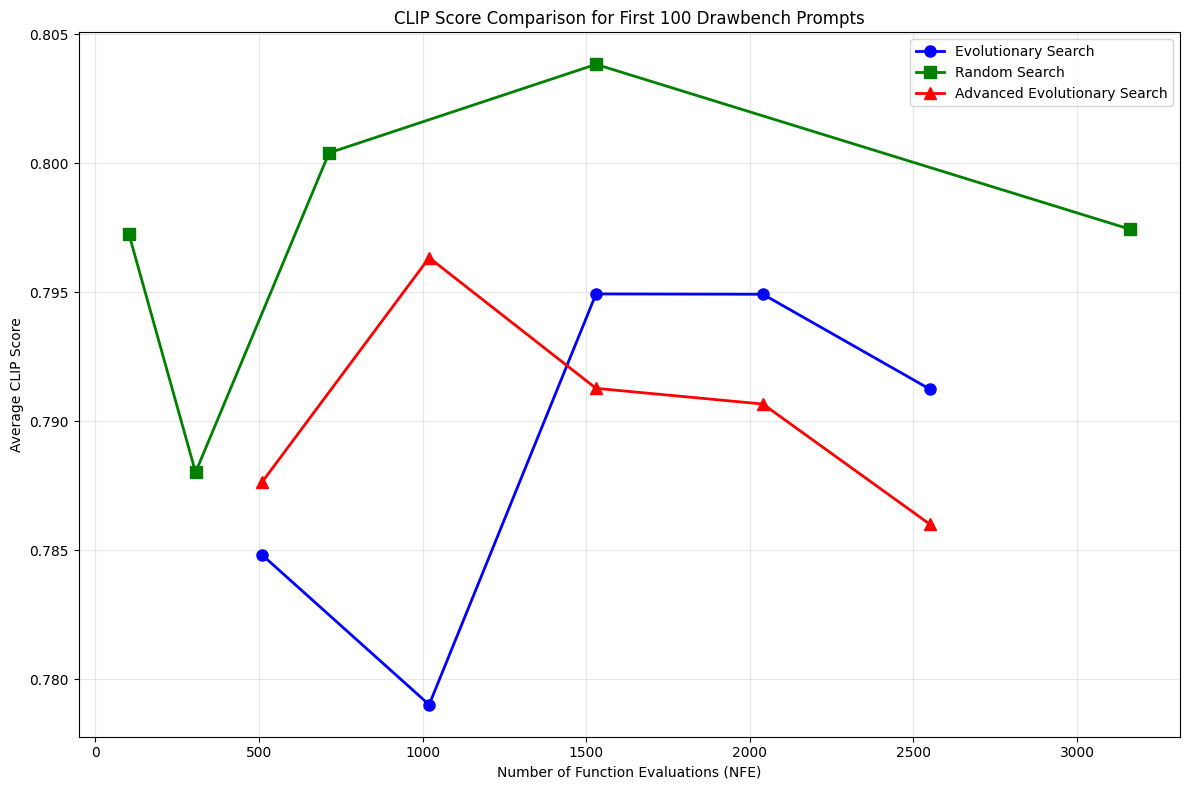

In [82]:
evo_x = [510, 1020, 1530, 2040, 2550]
evo_y = [np.float64(0.7848114013671875), np.float64(0.7790130615234375), np.float64(0.79493408203125), np.float64(0.794921875), np.float64(0.79124755859375)]

random_x = [102, 306, 714, 1530, 3162]
random_y = [np.float64(0.7972680068597561), np.float64(0.7880196920255336), np.float64(0.8004016411013719), np.float64(0.8038330078125), np.float64(0.7974431544174383)]

adv_evo_x = [510, 1020, 1530, 2040, 2550]
adv_evo_y = [np.float64(0.787652587890625), np.float64(0.796337890625), np.float64(0.7912750244140625), np.float64(0.790667724609375), np.float64(0.7860107421875)]

# Create a new figure
plt.figure(figsize=(12, 8))

# Plot all three lines
plt.plot(evo_x, evo_y, 'o-', color='blue', linewidth=2, markersize=8, label='Evolutionary Search')
plt.plot(random_x, random_y, 's-', color='green', linewidth=2, markersize=8, label='Random Search')
plt.plot(adv_evo_x, adv_evo_y, '^-', color='red', linewidth=2, markersize=8, label='Advanced Evolutionary Search')

# Add labels and title
plt.xlabel('Number of Function Evaluations (NFE)')
plt.ylabel('Average CLIP Score')
plt.title('CLIP Score Comparison for First 100 Drawbench Prompts')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.savefig('clip_score_comparison.png', dpi=300)
plt.show()

In [21]:
import os
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.gridspec import GridSpec
import re
from pathlib import Path

def extract_info_from_json(filepath):
    """Extract score and image path from JSON file"""
    try:
        with open(filepath, 'r') as file:
            data = json.load(file)
        
        score = data.get('best_score', {}).get('score', 0)
        img_path = data.get('best_img_path', '')
        prompt = data.get('prompt', '').strip('.')  # Remove trailing period
        search_round = data.get('search_round', 0)
        
        return {
            'score': score,
            'img_path': img_path,
            'prompt': prompt,
            'search_round': search_round,
            'json_path': filepath
        }
    except Exception as e:
        print(f"Error reading {filepath}: {e}")
        return None

def find_top_images(json_dir, top_n=25):
    """Find the top N highest scoring images from all JSON files"""
    # Get all JSON files in the directory
    json_files = glob.glob(os.path.join(json_dir, '*.json'))
    
    if not json_files:
        print(f"No JSON files found in {json_dir}")
        return []
    
    # Extract info from all files
    all_images_info = []
    for file_path in json_files:
        info = extract_info_from_json(file_path)
        if info:
            all_images_info.append(info)
    
    # Sort by score in descending order
    all_images_info.sort(key=lambda x: x['score'], reverse=True)
    
    # Return top N
    return all_images_info[:top_n]

def resolve_image_path(img_path, base_dir):
    """Resolve image path considering various possibilities"""
    # First try the path as is (might be absolute)
    if os.path.exists(img_path):
        return img_path
    
    # Try relative to base_dir
    rel_path = os.path.join(base_dir, img_path)
    if os.path.exists(rel_path):
        return rel_path
    
    # Try just the filename (basename)
    img_name = os.path.basename(img_path)
    basename_path = os.path.join(base_dir, img_name)
    if os.path.exists(basename_path):
        return basename_path
    
    # If img_path contains 'output/', try finding the file by its basename in the base directory
    if 'output/' in img_path:
        img_name = os.path.basename(img_path)
        basename_path = os.path.join(base_dir, img_name)
        if os.path.exists(basename_path):
            return basename_path
    
    # If we still can't find it, return None
    return None

def create_image_grid(top_images, base_dir, output_file="top_25_images_grid.png", figsize=(20, 20)):
    """Create a 5x5 grid of the top 25 images"""
    rows, cols = 5, 5
    
    # Create a figure with gridspec for more control
    fig = plt.figure(figsize=figsize)
    gs = GridSpec(rows, cols, figure=fig)
    
    # Track if we found at least one image
    found_at_least_one = False
    missing_count = 0
    
    # Place images in grid
    for i, img_info in enumerate(top_images):
        if i >= rows * cols:
            break  # Only show top 25
            
        row, col = i // cols, i % cols
        ax = fig.add_subplot(gs[row, col])
        
        # Try to resolve image path
        img_path = img_info['img_path']
        resolved_path = resolve_image_path(img_path, base_dir)
        
        if resolved_path and os.path.exists(resolved_path):
            found_at_least_one = True
            try:
                # Display image using PIL to handle various image formats
                img = Image.open(resolved_path)
                ax.imshow(np.array(img))
                
                # Add score and prompt as title
                prompt_text = img_info['prompt']
                if len(prompt_text) > 25:
                    prompt_text = prompt_text[:22] + "..."
                    
                title = f"#{i+1}: Score {img_info['score']:.2f}\n{prompt_text}"
                ax.set_title(title, fontsize=10)
            except Exception as e:
                print(f"Error loading image {resolved_path}: {e}")
                missing_count += 1
                ax.text(0.5, 0.5, f"Error loading image\n{os.path.basename(img_path)}", 
                        ha='center', va='center', transform=ax.transAxes)
        else:
            missing_count += 1
            # If image couldn't be loaded, show a message
            ax.text(0.5, 0.5, f"Image not found\n{os.path.basename(img_path)}", 
                    ha='center', va='center', transform=ax.transAxes)
            
        # Remove axes
        ax.axis('off')
    
    # Adjust layout
    plt.tight_layout()
    
    # Print status
    if missing_count > 0:
        print(f"Warning: {missing_count} out of 25 images could not be loaded.")
    
    # Save figure if we found at least one image
    if found_at_least_one and output_file:
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
        print(f"Grid saved as {output_file}")
    
    # Return the figure for Jupyter display
    return fig

def print_top_images_info(top_images):
    """Print information about the top images"""
    print("\nTop 25 Images Information:")
    print("-" * 70)
    print(f"{'Rank':<5}{'Score':<8}{'Search Round':<14}{'Prompt'}")
    print("-" * 70)
    
    for i, img_info in enumerate(top_images):
        prompt = img_info['prompt']
        # No truncation - display full prompt
        print(f"{i+1:<5}{img_info['score']:<8.2f}{img_info['search_round']:<14}{prompt}")

def visualize_top_images(json_dir, top_n=25, output_file="top_25_images_grid.png", figsize=(20, 20)):
    """Main function to visualize top images - for use in Jupyter notebooks"""
    # Find top images
    top_images = find_top_images(json_dir, top_n)
    
    if not top_images:
        print("No images found.")
        return None
    
    # Print information about top images
    print_top_images_info(top_images)
    
    # Create image grid
    fig = create_image_grid(top_images, json_dir, output_file, figsize)
    
    return fig

# Example usage in Jupyter notebook:
# json_dir = "path/to/your/json/files"
# fig = visualize_top_images(json_dir)
# If you don't want to save the figure, use:
# fig = visualize_top_images(json_dir, output_file=None)

Error reading output/sd-v1.5/gemini/overall_score/20250513_152113/config.json: 'NoneType' object has no attribute 'strip'

Top 25 Images Information:
----------------------------------------------------------------------
Rank Score   Search Round  Prompt
----------------------------------------------------------------------
1    10.00   5             A sphere made of kitchen tile. A sphere with the texture of kitchen tile
2    10.00   3             A sphere made of kitchen tile. A sphere with the texture of kitchen tile
3    10.00   4             Rainbow coloured penguin
4    10.00   5             A panda making latte art
5    10.00   3             Rainbow coloured penguin
6    10.00   5             Rainbow coloured penguin
7    10.00   5             A shark in the desert
8    10.00   5             A small blue book sitting on a large red book
9    10.00   3             A small blue book sitting on a large red book
10   9.80    4             A panda making latte art
11   9.80    5     

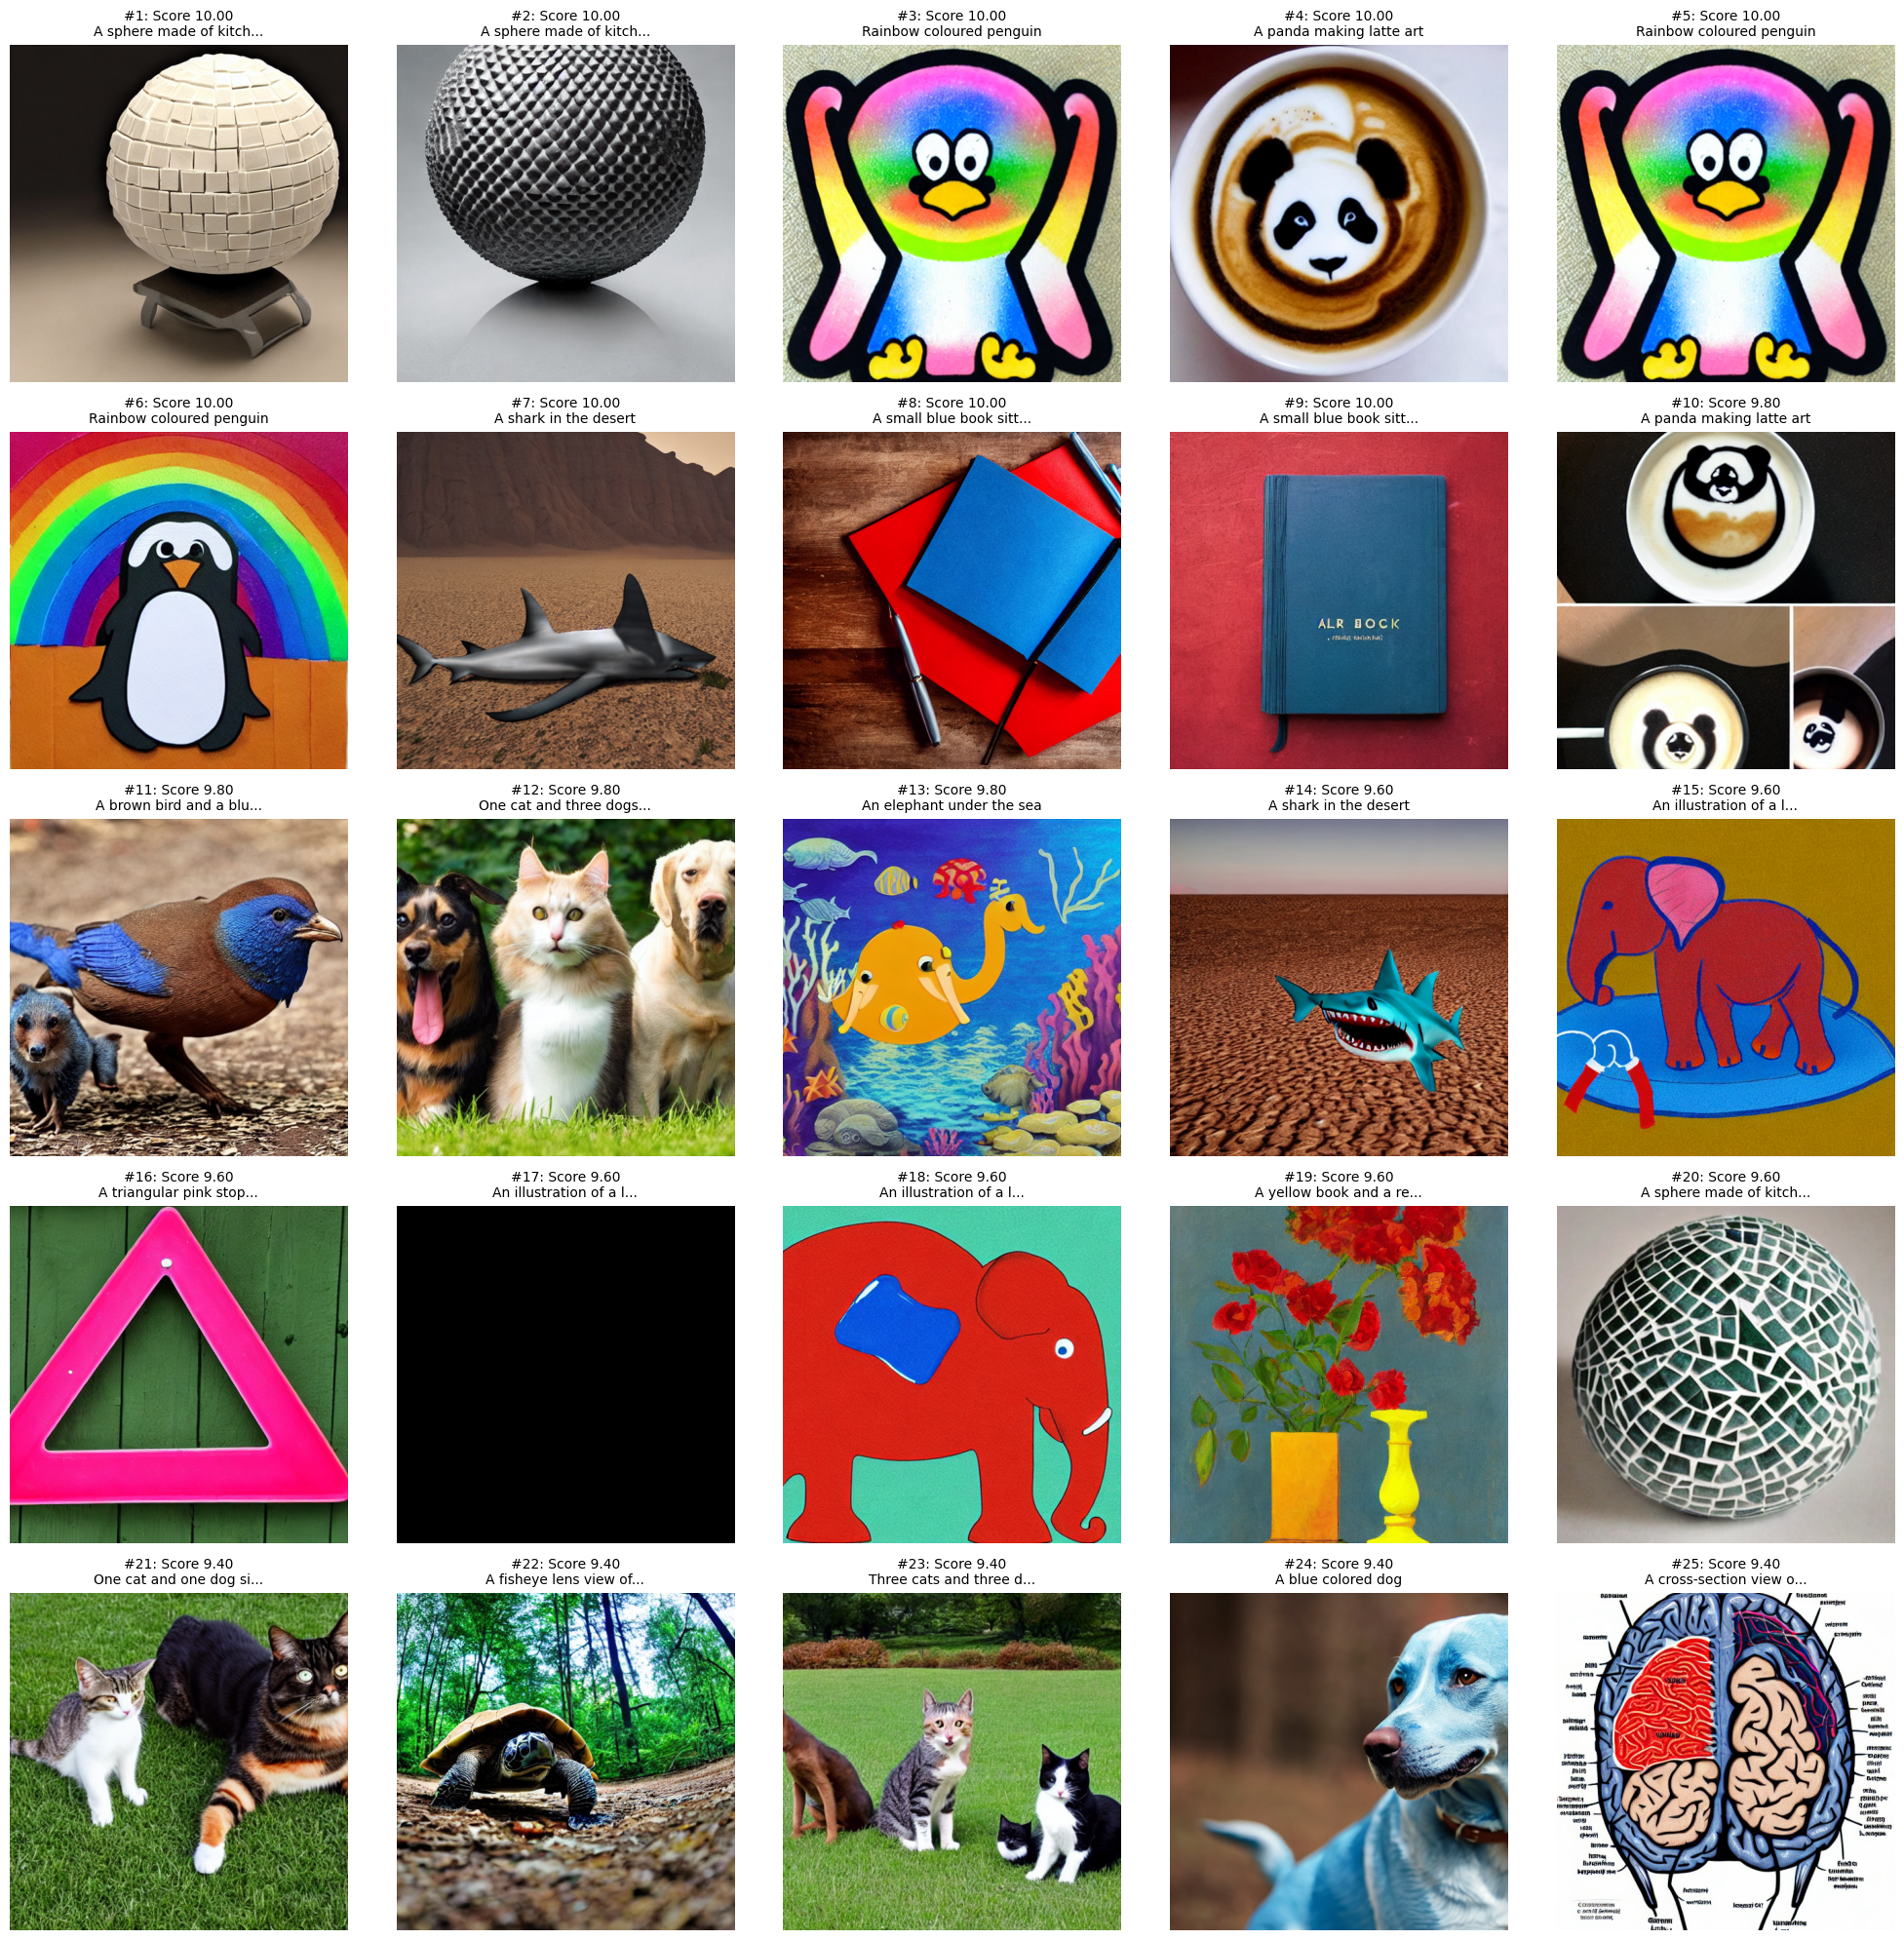

In [85]:
# json_dir = "output/sd-v1.5/gemini/overall_score/20250418_015550/"

# json_dir = "output/sd-v1.5/gemini/overall_score/20250512_153437/"

json_dir = "output/sd-v1.5/gemini/overall_score/20250513_152113/"

fig = visualize_top_images(json_dir, output_file=None)